# Anime Recommendation System

## Collaboritive Recommendation System by using KNN
#### By Fandi Yi

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


Bad key "text.kerning_factor" on line 4 in
C:\Users\fandi\Anaconda3\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df=pd.read_csv('rating.csv')
df2=pd.read_csv('anime.csv')

In [3]:
df2

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
#split string by comma to create a list of genre for each row
df2['genre']=df2['genre'].str.split(',')

In [5]:
#Pivot table of  by anime_id and user_id
result = df.pivot_table(index='anime_id', 
                        columns='user_id', 
                        values='rating')
result.columns.name = None


In [6]:
#replace nan with 0
result=result.fillna(0)

In [7]:
result

,1,2,3,4,5,6,7,8,9,10,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,10.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,10.0,0.0
6,0.0,0.0,0.0,-1.0,8.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
no_user_voted = df.groupby('anime_id')['rating'].agg('count')
no_anime_voted = df.groupby('user_id')['rating'].agg('count')

### Plot The distribution of number of user voted with anime id 

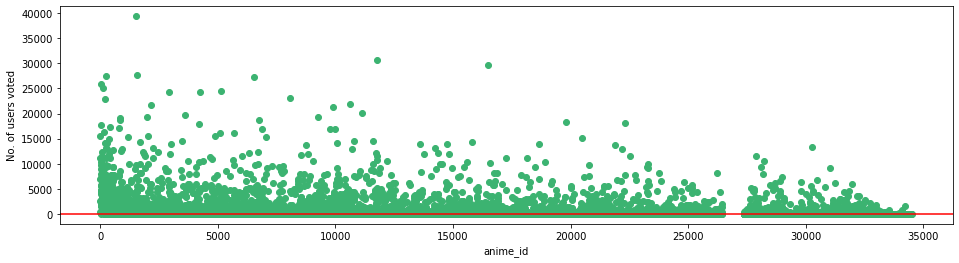

In [9]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('anime_id')
plt.ylabel('No. of users voted')
plt.show()

### Plot The distribution of number of votes by user with user id 

In [10]:
#Drop the animes which have less than 10 rating or viewing
final_dataset = result.loc[no_user_voted[no_user_voted > 10].index,:]

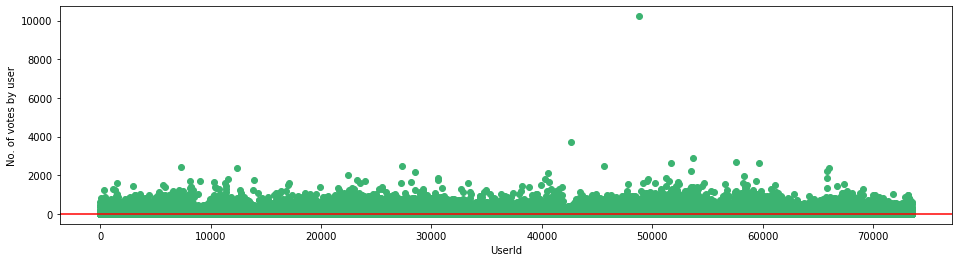

In [11]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_anime_voted.index,no_anime_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [12]:
final_dataset=final_dataset.loc[:,no_anime_voted[no_anime_voted > 10].index]

In [13]:
final_dataset=final_dataset.reset_index()

In [14]:
final_dataset

user_id,anime_id,1,3,4,5,6,7,8,11,12,...,73502,73503,73504,73506,73507,73510,73511,73512,73513,73515
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,10.0,0.0,9.0,0.0,0.0,0.0,9.0,10.0
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,10.0,0.0,8.0,0.0,0.0,0.0,8.0,10.0
2,6,0.0,0.0,-1.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,10.0
3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,34238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7654,34240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7655,34283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7656,34324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
final_dataset.index

RangeIndex(start=0, stop=7658, step=1)

In [16]:
matrix_data = csr_matrix(final_dataset.values)

In [17]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(matrix_data)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [18]:
def get_anime_recommendation(name):
    anime_recommend_n = 10
    anime_list = df2[df2['name'].str.contains(name)]  
    if len(anime_list):        
        anime_idx= anime_list.iloc[0]['anime_id']
        
        anime_idx = final_dataset[final_dataset['anime_id'] == anime_idx].index[0]
        distances , indices = knn.kneighbors(matrix_data[anime_idx],n_neighbors=anime_recommend_n+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            
            anime_idx = final_dataset.iloc[val[0]]['anime_id']
            idx =df2[df2['anime_id'] ==anime_idx].index
            
            recommend_frame.append({'name':df2.iloc[idx]['name'].values[0],'Similarity (0-1)':val[1],'Genre':df2.iloc[idx]['genre'].values[0][0],'Type':df2.iloc[val[0]]['type'],'Rating':df2.iloc[val[0]]['rating']})
        df = pd.DataFrame(recommend_frame,index=range(1,anime_recommend_n+1))
        return df.sort_values(by=['Similarity (0-1)'], ascending=False)
    else:
        return "No movies found. Please check your input"

In [19]:
import ipywidgets as widgets
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#### Result with UI interface

In [20]:
input_text =widgets.Text(
    value='',
    placeholder='Please enter Anime Name (ง ͡❛ ͜ʖ ͡❛)ง',
    description='Anime Name:',
    disabled=False
)
btn = widgets.Button(description='Search!')
out = widgets.Output(layout={'border': '1px solid black'})
display(input_text)
display(btn)
display(out)
def callback(wdgt):
    # replace by something useful
    global dummy
    out.clear_output()
    dummy = get_anime_recommendation(input_text.value)
    with out:
        display(dummy)

btn.on_click(callback)

Text(value='', description='Anime Name:', placeholder='Please enter Anime Name (ง ͡❛\u202f͜ʖ ͡❛)ง')

Button(description='Search!', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

### Before enter name
![title](ui1.png)

### Example
![title](UI2.png)

## Hybrid Collaborative system with K-mean Clustering
#### By Finn Dong

In [21]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

# Calculating each user average rating
userRatingDist = rating.groupby(['user_id']).mean().reset_index()
#userRatingDist.columns = ['user_id', 'average_rating_score']

In [22]:
URD1 = pd.merge(anime,rating,on=['anime_id','anime_id'])
URD2 = pd.merge(URD1,userRatingDist,on=['user_id','user_id'])
URD2= URD2[URD2.user_id <= 10000]

In [23]:
URD2 = URD2.drop(columns=["anime_id_y"])
URD2 = URD2.rename(columns = {"anime_id_x":"anime_id","rating_x":"overall_rating","rating_y":"user_rating","rating":"user_avg_rating"})

In [24]:
user_anime2 = pd.pivot_table(
    URD2,values="user_rating",
    index="user_id",
    columns="name"
)

In [25]:
user_anime3 = user_anime2.fillna(0)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(user_anime3)
pca_samples = pca.transform(user_anime3)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
user_gp = pd.DataFrame(pca_samples)
user_gp.head()

,0,1,2
0,-21.112792,-2.446000,1.230736
1,-18.533342,-3.024162,2.530642
2,4.884069,-14.540308,-14.954333
3,-20.909953,-2.604147,3.173184
4,28.486885,-8.663861,-1.749299


In [28]:
distortions = []
K = []
for i in range(2,10):
    model = KMeans(n_clusters=i)
    model.fit(user_gp)
    distortions.append(model.inertia_)
    K.append(i)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'Distortion')

Text(0.5, 1.0, 'The Elbow Method')

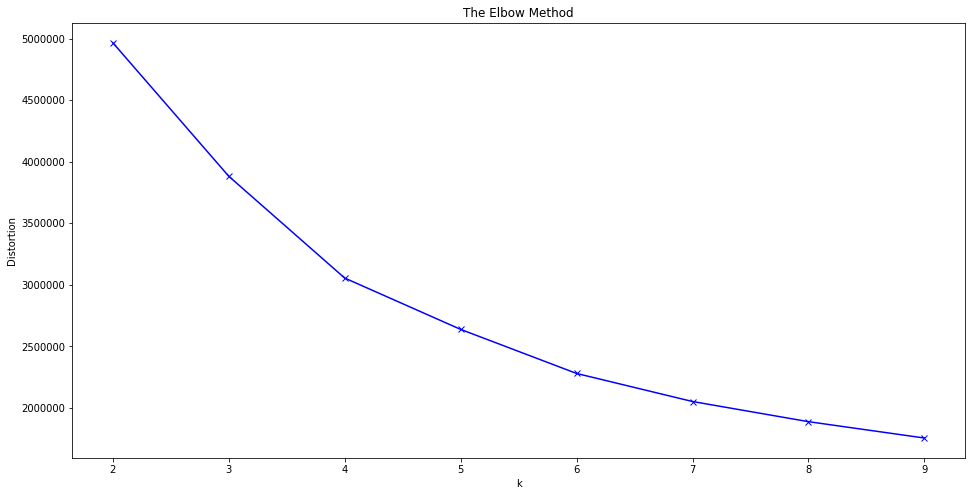

In [29]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [30]:
clstr = KMeans(n_clusters=6,random_state=0).fit(user_gp)
centroid = clstr.cluster_centers_
cntrd_preds = clstr.predict(user_gp)

print(centroid)

[[ 47.25937768 -24.74250149   2.75132472]
 [-14.48362579  -1.75900591   1.40273034]
 [ 12.36972887  -9.51460297  -6.52896683]
 [ 37.32216707  32.08577105   3.00381755]
 [105.9508213    1.81689925  14.74446915]
 [  0.93454913  14.17812062  -1.97219691]]


In [31]:
user_anime3['cluster']=cntrd_preds

Text(0.5, 0, 'ch1')

Text(0, 0.5, 'ch2')

Text(0.5, 1.0, '2D Scatter Points')

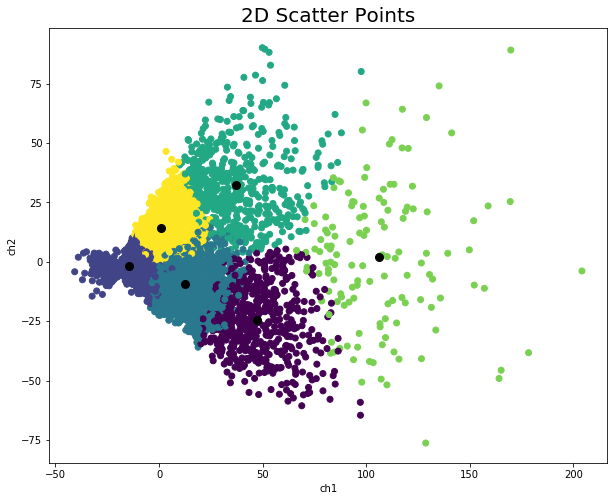

In [32]:
fig = plt.figure(figsize=(10,8))
plt.scatter(user_gp[0],user_gp[1],c = cntrd_preds)
for ci,c in enumerate(centroid):
    plt.plot(c[0], c[1], 'o', markersize=8, color='black', alpha=1)

plt.xlabel('ch1')
plt.ylabel('ch2')

plt.title('2D Scatter Points', fontsize=20)
plt.show()

### Clusters

#### Calculating each anime overall user rating within each cluster

In [33]:
c0 = user_anime3[user_anime3['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime3[user_anime3['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime3[user_anime3['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime3[user_anime3['cluster']==3].drop('cluster',axis=1).mean()
c4 = user_anime3[user_anime3['cluster']==4].drop('cluster',axis=1).mean()
c5 = user_anime3[user_anime3['cluster']==5].drop('cluster',axis=1).mean()

In [34]:
user_anime3

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [35]:
df0 = pd.DataFrame(c0).reset_index().sort_values(by=[0], ascending = False)
df1 = pd.DataFrame(c1).reset_index().sort_values(by=[0], ascending = False)
df2 = pd.DataFrame(c2).reset_index().sort_values(by=[0], ascending = False)
df3 = pd.DataFrame(c3).reset_index().sort_values(by=[0], ascending = False)
df4 = pd.DataFrame(c4).reset_index().sort_values(by=[0], ascending = False)
df5 = pd.DataFrame(c5).reset_index().sort_values(by=[0], ascending = False)

In [36]:
df0 = df0.reset_index(drop=True).rename({0:"score"},axis = 1)
df1 = df1.reset_index(drop=True).rename({0:"score"},axis = 1)
df2 = df2.reset_index(drop=True).rename({0:"score"},axis = 1)
df3 = df3.reset_index(drop=True).rename({0:"score"},axis = 1)
df4 = df4.reset_index(drop=True).rename({0:"score"},axis = 1)
df5 = df5.reset_index(drop=True).rename({0:"score"},axis = 1)

### Recommendation Results

##### Pick 10 most related anime based on the average mean rating in the highest rating cluster

In [37]:
def res(x):
    sc0 = df0.score[df0["name"] == x].tolist()
    sc1 = df1.score[df1["name"] == x].tolist()
    sc2 = df2.score[df2["name"] == x].tolist()
    sc3 = df3.score[df3["name"] == x].tolist()
    sc4 = df4.score[df4["name"] == x].tolist()
    sc5 = df5.score[df5["name"] == x].tolist()

    y = max(sc0, sc1, sc2, sc3, sc4, sc5)
    score=[sc0[0], sc1[0], sc2[0], sc3[0], sc4[0], sc5[0]]
    rcmd = {
        sc0[0]:df0,
        sc1[0]:df1,
        sc2[0]:df2,
        sc3[0]:df3,
        sc4[0]:df4,
        sc5[0]:df5
    }
    rcmd1 = {
        0:df0,
        1:df1,
        2:df2,
        3:df3,
        4:df4,
        5:df5
    }
    rcmd[y[0]]

    index = rcmd[y[0]].index[rcmd[y[0]]["name"] == x].tolist()

    list_name=[]
    index1=index[0]
    if index1 >=5 and index1<=(len(rcmd1[score.index(max(score))])-5):
        list_name.append(rcmd1[score.index(max(score))]['name'][(index1-5):index1])
        list_name.append(rcmd1[score.index(max(score))]['name'][index1+1:(index1+6)])
    elif index1 <5:
        list_name.append(rcmd1[score.index(max(score))]['name'][0:index1])
        list_name.append(rcmd1[score.index(max(score))]['name'][index1+1:11])
    else:
        list_name.append(rcmd1[score.index(max(score))]['name'][index1+1:len(rcmd1[score.index(max(score))])])
        list_name.append(rcmd1[score.index(max(score))]['name'][len(rcmd1[score.index(max(score))])-11: index1])

    rec_results = pd.DataFrame(list_name[0].tolist() + list_name[1].tolist(),columns = ["Recommended"])
    print(rec_results)

In [38]:
# test example: Kiseijuu: Sei no Kakuritsu
x = input()
res(x)

Kiseijuu: Sei no Kakuritsu
                                       Recommended
0  Mondaiji-tachi ga Isekai kara Kuru Sou Desu yo?
1                                         Sankarea
2                             Amagi Brilliant Park
3                                   Kimi ni Todoke
4                                           K-On!!
5                                       Usagi Drop
6                                  Higashi no Eden
7                                          Btooom!
8           Fate/stay night: Unlimited Blade Works
9                               Sora no Otoshimono


## Collaborative Recommendation System with Correlation (Pearson R)
#### By Di Gao

In [39]:
anime = pd.read_csv('anime.csv',
                    low_memory=False)
rating = pd.read_csv('rating.csv',
                     low_memory=False)
anime = anime.rename(columns={"rating":"anime_rating"})
anime.head()

,anime_id,name,genre,type,episodes,anime_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [40]:
df_title=anime.drop(['genre','type','episodes','anime_rating','members'], axis=1)
df_title.set_index('anime_id',inplace=True)
df_title.head(10)

,name
anime_id,
32281,Kimi no Na wa.
5114,Fullmetal Alchemist: Brotherhood
28977,Gintama°
9253,Steins;Gate
9969,Gintama&#039;
32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
11061,Hunter x Hunter (2011)
820,Ginga Eiyuu Densetsu
15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...


In [41]:
rating = rating.rename(columns={"rating":"user_rating"})
rating.head()

,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [42]:
#merge the 2 datasets
df = rating.merge(anime, on = "anime_id", how="right")
#To reduce the size of the dataset and maintain the full rating of each user, 
#we reduce the size by selecting users with the user id <=10000
df =df[df['user_id']<=10000]
print(df.head())
print("---------------------------")
print(df.shape)

   user_id  anime_id  user_rating    name  \
0      1.0        20         -1.0  Naruto   
1      3.0        20          8.0  Naruto   
2      5.0        20          6.0  Naruto   
3      6.0        20         -1.0  Naruto   
4     10.0        20         -1.0  Naruto   

                                               genre type episodes  \
0  Action, Comedy, Martial Arts, Shounen, Super P...   TV      220   
1  Action, Comedy, Martial Arts, Shounen, Super P...   TV      220   
2  Action, Comedy, Martial Arts, Shounen, Super P...   TV      220   
3  Action, Comedy, Martial Arts, Shounen, Super P...   TV      220   
4  Action, Comedy, Martial Arts, Shounen, Super P...   TV      220   

   anime_rating  members  
0          7.81   683297  
1          7.81   683297  
2          7.81   683297  
3          7.81   683297  
4          7.81   683297  
---------------------------
(1042697, 9)


In [43]:
df_p = pd.pivot_table(df,
                      values='user_rating',
                      index='user_id',
                      columns='anime_id')

### Recommendation Result 

In [44]:
corr_score=[]
def anime_recom(title):
    print("The related animes to ({}):".format(title))
    i = int(df_title.index[df_title['name'] == title][0])
    X=df_p[i]
    corr=df_p.corrwith(X)
    corr_target = pd.DataFrame(corr, columns = ['Correlation'])
    corr_target.dropna(inplace = True)
    corr_target = corr_target.sort_values('Correlation', ascending = False)
    corr_target.index = corr_target.index.map(int)
    corr_target = corr_target.join(df_title)
    print(corr_target[:10].to_string(index=False))
    print("Average Correlation score with This Anime: ",round(np.mean(corr_target['Correlation'].tolist()),4)) ## to test not all the animes are closly related wit target anime

In [45]:
anime_recom("Kiseijuu: Sei no Kakuritsu")

The related animes to (Kiseijuu: Sei no Kakuritsu):
 Correlation                                   name
         1.0                           Chiryokumaru
         1.0                             Outlanders
         1.0                       Toei Robot Girls
         1.0                Shoukoujo The Animation
         1.0                     Stratos 4: Logbook
         1.0                      Plawres Sanshirou
         1.0                            Coluboccoro
         1.0                               Dokkoida
         1.0  Toriko: Barbarian Ivy wo Hokaku Seyo!
         1.0                                 School
Average Correlation score with This Anime:  0.5006


# Model Evaluation

###### Suprise: A package can help us to evaluate (RMSE, MAE) the rating based recomender system's performance based on different algorithms, which includes KNN, Clustering

In [90]:
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans, KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
reader = Reader(rating_scale=(-1, 10))
data = Dataset.load_from_df(df[['user_id', 'anime_id', 'user_rating']][:10000], reader)
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
KNNWithMeans,2.951271,1.381654,1.863352
KNNBasic,2.953080,1.448098,1.832780
KNNBaseline,2.956082,1.201766,1.753331
KNNWithZScore,2.980053,1.484021,1.895639
SVD,3.075296,0.386304,0.018928
CoClustering,3.090896,0.539878,0.015647
BaselineOnly,3.351612,0.014960,0.014643
NormalPredictor,4.559847,0.008976,0.017962


As the benchmark table shown above, we can see that the KNN algorithm more suitable for our Anime recommendation dataset(whith lower RMSE).
